# Imblance data

In [1]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

No claim: 573518
Claim: 21694
Ratio: 26.44 : 1


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

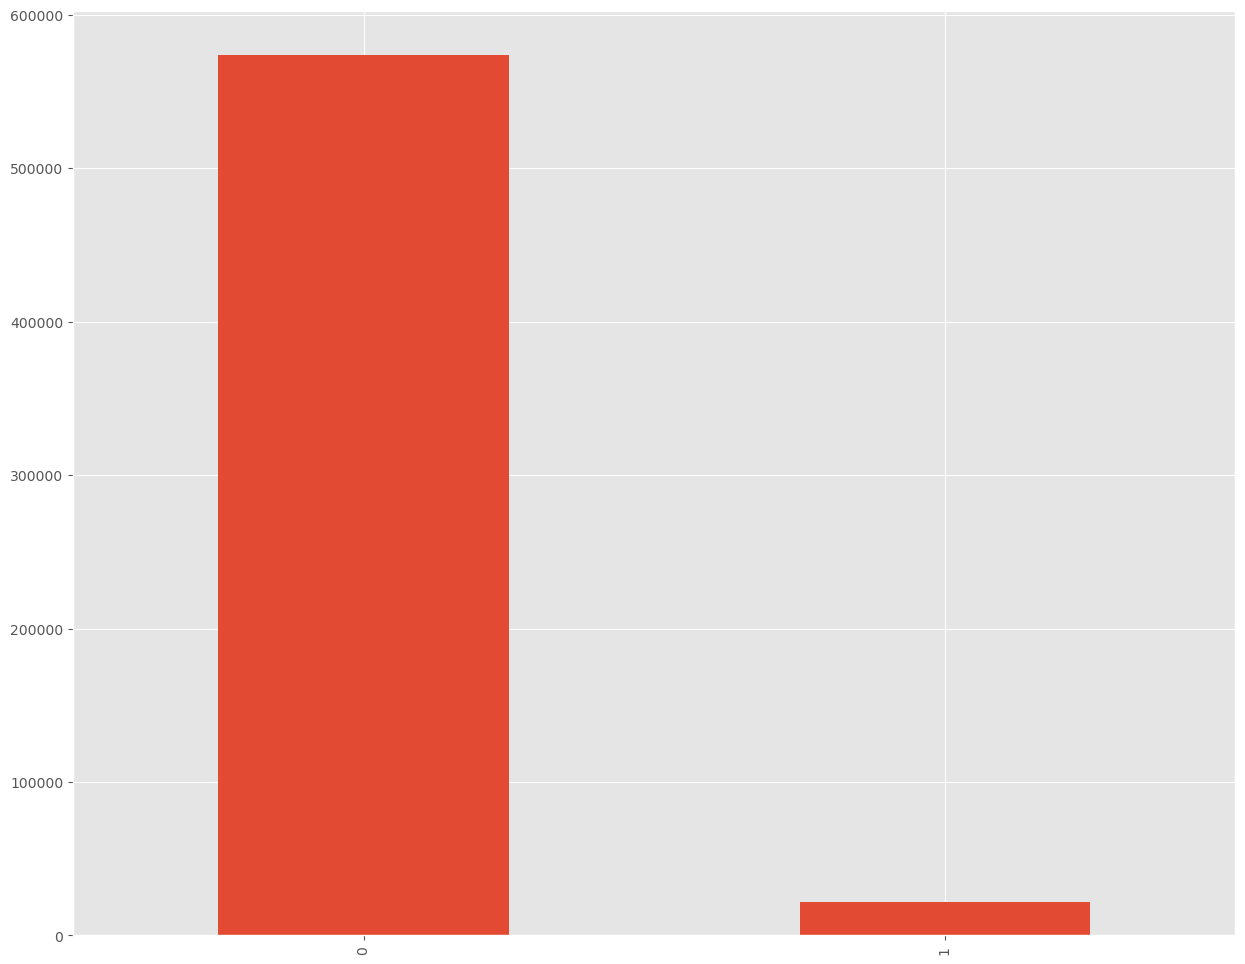

In [3]:


target_count = train.target.value_counts()
print('No claim:', target_count[0])
print('Claim:', target_count[1])
print('Ratio:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar');


use Logistic regression to see the result

In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


features = train.columns[2:]

X = train[features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


In [7]:
model.fit(X_train[['ps_calc_02']], y_train)
y_pred = model.predict(X_test[['ps_calc_02']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.34%


You can see that the accuracy for 1 is 0, indicating that we did not correctly predict any positive cases.

In [5]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114686
           1       0.00      0.00      0.00      4357

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

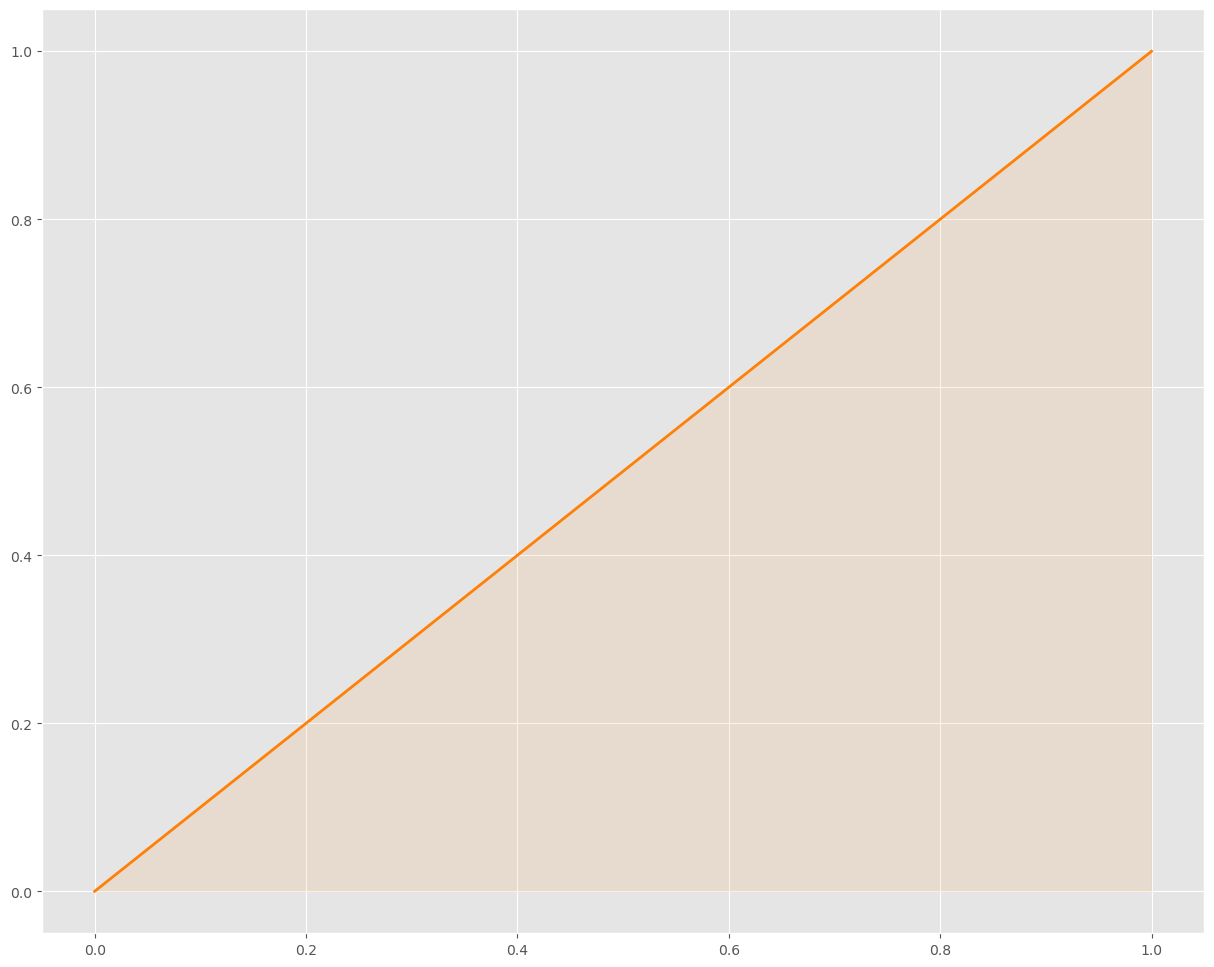

In [6]:
aucroc = roc_auc_score(y_test, y_pred)
fpr, tpr, t = roc_curve(y_test, y_pred)
fig, ax = plt.subplots(nrows=1,ncols=1, sharey=True)

ax.plot([0]+fpr.tolist(), [0]+tpr.tolist(), lw = 2, color = '#fe8006')
ax.fill_between([0]+fpr.tolist(), [0]+tpr.tolist(), color = '#fe8006', alpha=0.1)

# Random Undersampling
Undersampling refers to the approach of reducing the data from the class with a higher quantity (majority class) to match the quantity of the class with lesser data (minority class).

**Method: Randomly sample an equal amount of data from the majority class as there is in the minority class.**



In [8]:
# Class count
count_class_0,count_class_1 = train.target.value_counts()

# Divide by class
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Random under-sampling:
0    21694
1    21694
Name: target, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


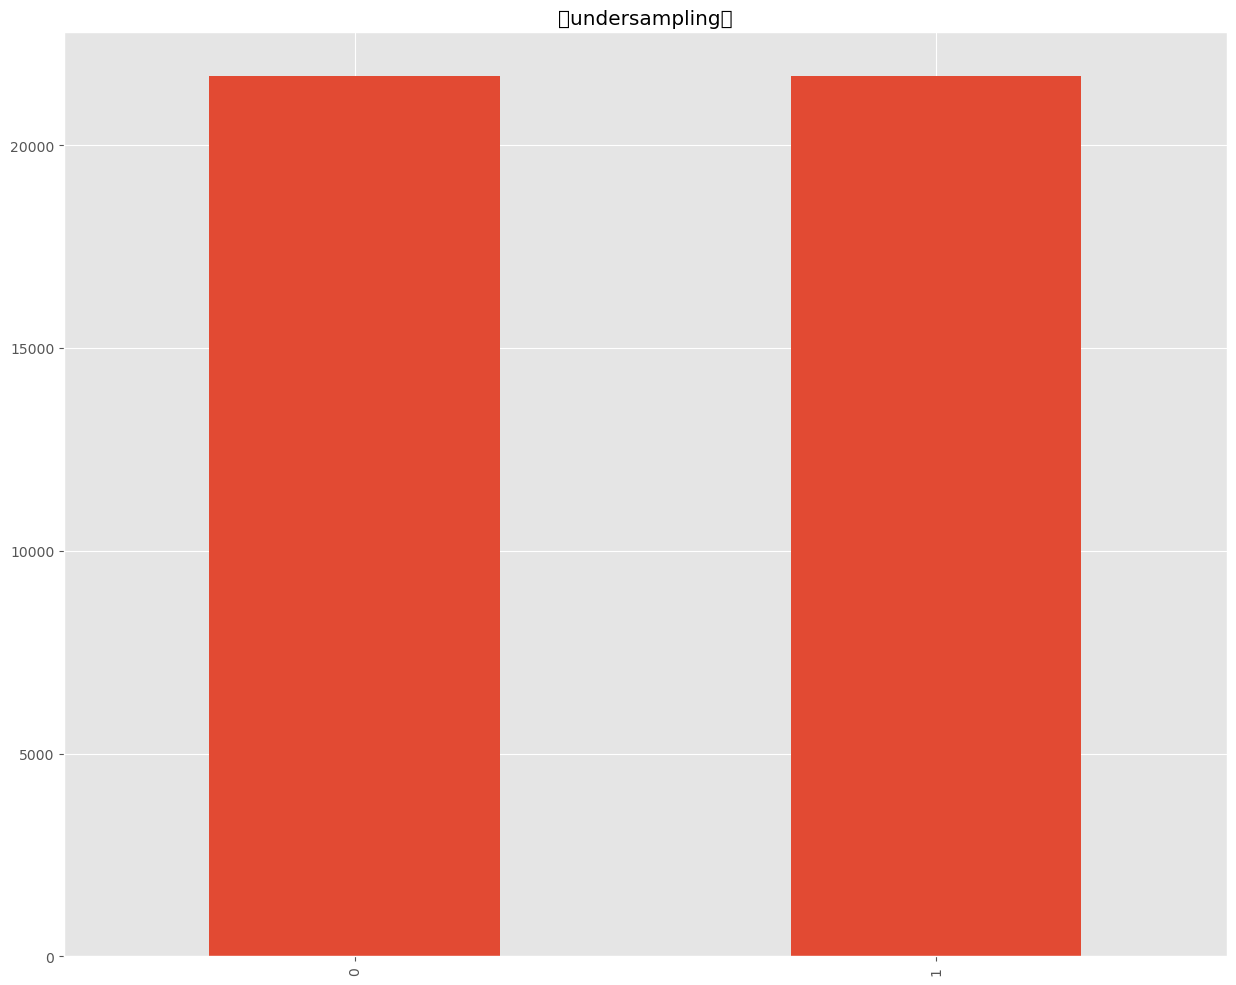

In [9]:
df_class_0_undersampling = df_class_0.sample(count_class_1)
df_undersampling = pd.concat([df_class_0_undersampling, df_class_1], axis=0)

print('Random under-sampling:')
print(df_undersampling.target.value_counts())

df_undersampling.target.value_counts().plot(kind='bar', title='（undersampling）');

### random over sampling


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Random over-sampling:
0    573518
1    573518
Name: target, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

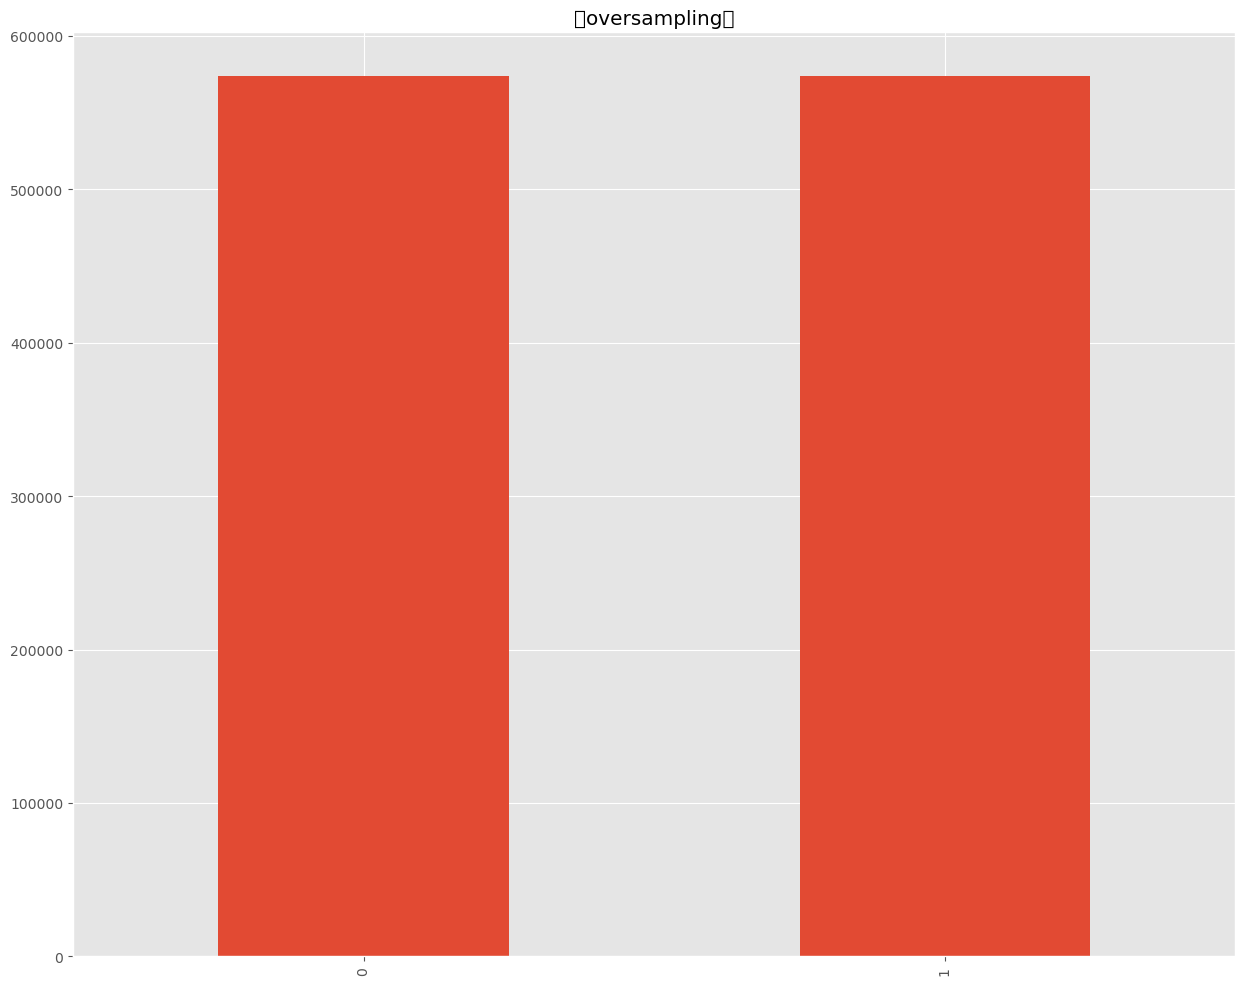

In [10]:
df_class_1_oversampling = df_class_1.sample(count_class_0, replace=True)
df_oversampling = pd.concat([df_class_0, df_class_1_oversampling], axis=0)

print('Random over-sampling:')
print(df_oversampling.target.value_counts())

df_oversampling.target.value_counts().plot(kind='bar', title='（oversampling）');

However, despite their simplicity, both of the aforementioned methods have drawbacks.

Undersampling directly removes many samples from the original data, which can lead to information loss.

Oversampling, due to the replication of samples from the minority class, can result in overfitting.

Therefore, resampling is not an optimal solution.

## Imblearn

By using imblearn, we can cluster the data of the majority class and perform undersampling by removing some data from each cluster, thereby reducing information loss.

In oversampling, we no longer directly copy the samples taken from the minority class, but instead introduce some minor changes, adding reasonable noise to increase the complexity and diversity of the data.

In [12]:
#! pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.7 MB/s eta 0:00:0000:0100:01


In [11]:
import sklearn

In [13]:
print(sklearn.__version__)

1.1.1


In [14]:
import imblearn

为了可视化，我们取出train里面100个样本。

In [15]:
df_demo = train.copy().sample(100,random_state = 0)

features = df_demo.columns[2:]

X = df_demo[features]
y = df_demo['target']

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#20beff', '#d80012']
    markers = ['o', '*']
    '补全代码'

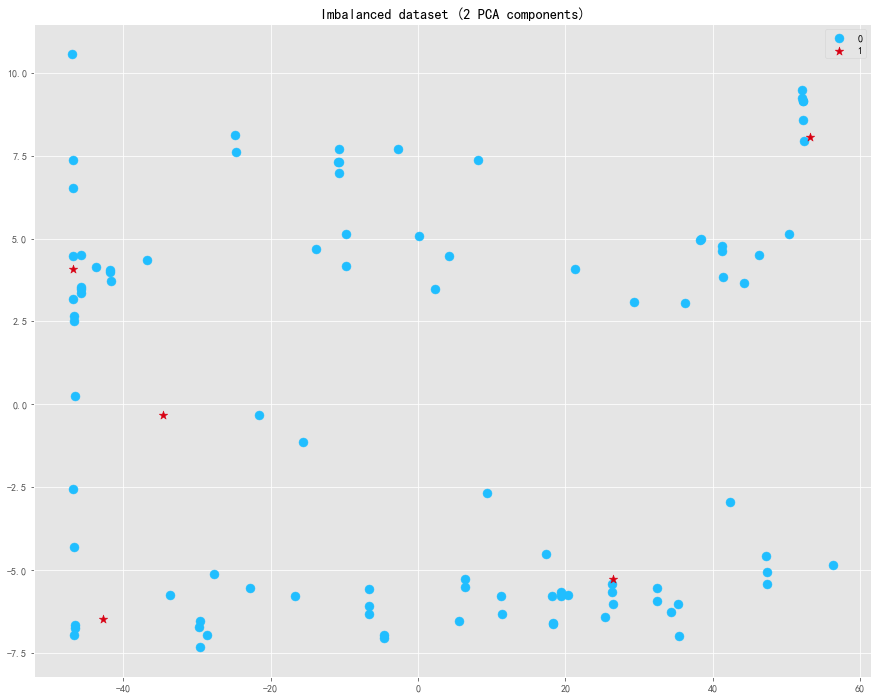

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

### Under-sampling

- RandomUnderSampler
- TomekLinks
- EditedNearestNeighbours
- RepeatedEditedNearestNeighbours
- AllKNN
- ClusterCentroids

#### RandomUnderSampler

[(0, 95), (1, 5)]
[(0, 5), (1, 5)]


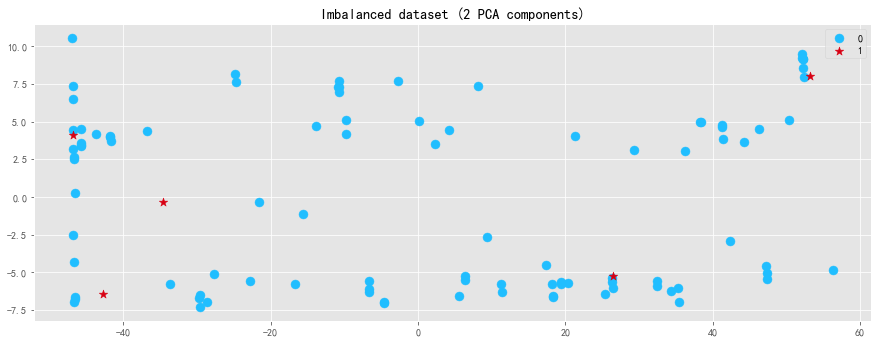

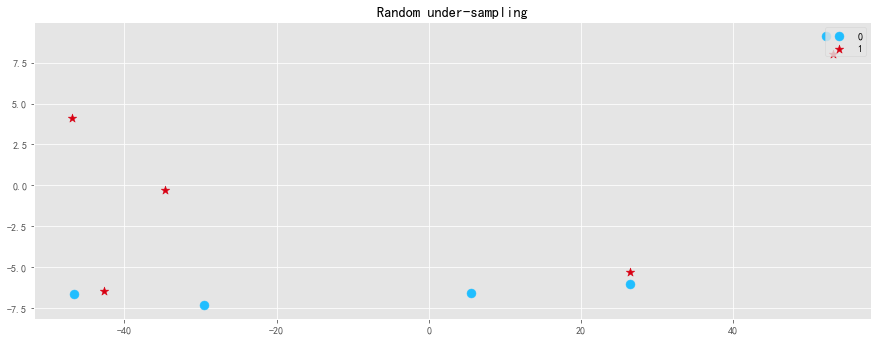

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2022)
X_rus, y_rus = rus.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_rus).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

#### Tomek’s links




<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/TomekLinks.png?raw=true width='800' />
</div>

[(0, 95), (1, 5)]
[(0, 93), (1, 5)]


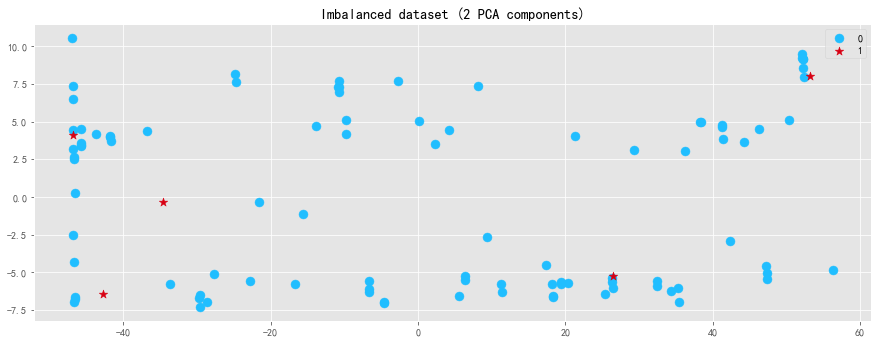

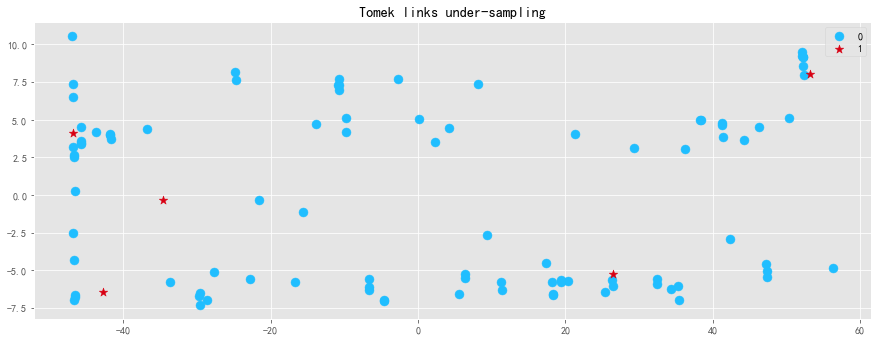

In [12]:
from imblearn.under_sampling import TomekLinks


tl = TomekLinks(sampling_strategy = 'auto')
X_tl, y_tl = tl.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_tl).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

[(0, 95), (1, 5)]
[(0, 87), (1, 5)]


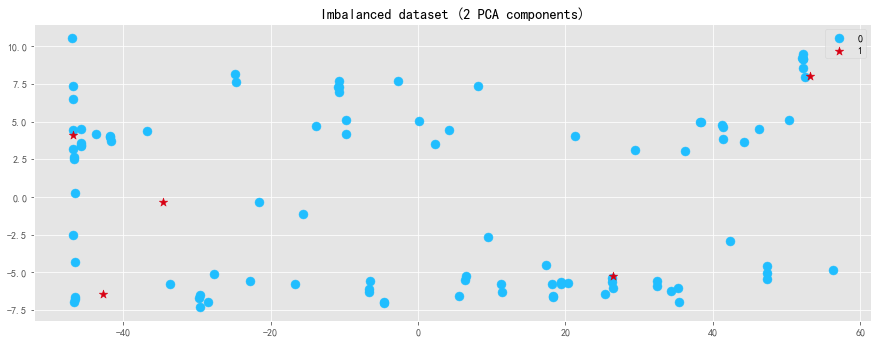

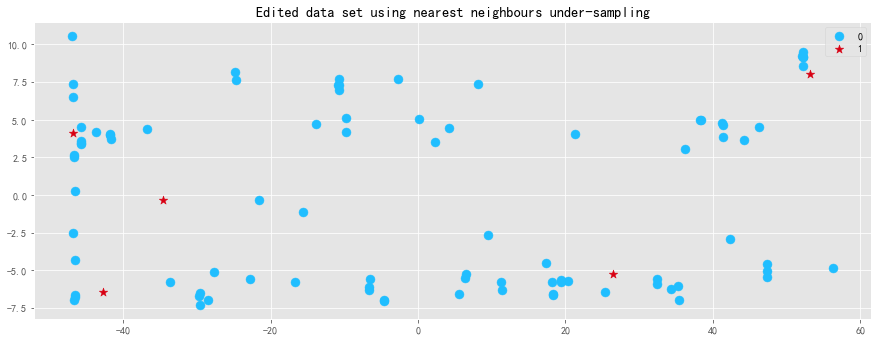

In [17]:
from imblearn.under_sampling import EditedNearestNeighbours


enn = EditedNearestNeighbours(sampling_strategy = 'auto',n_neighbors = 3)
X_enn, y_enn = enn.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_enn).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_enn, y_enn, 'Edited data set using nearest neighbours under-sampling')

#### Repeated Edited data set using nearest neighbours


[(0, 95), (1, 5)]
[(0, 76), (1, 5)]


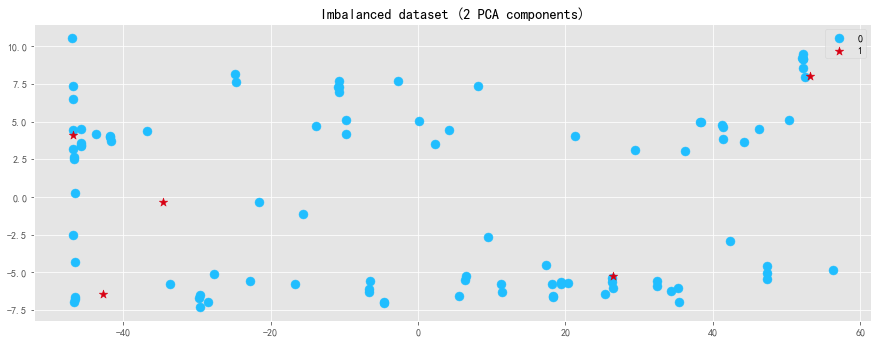

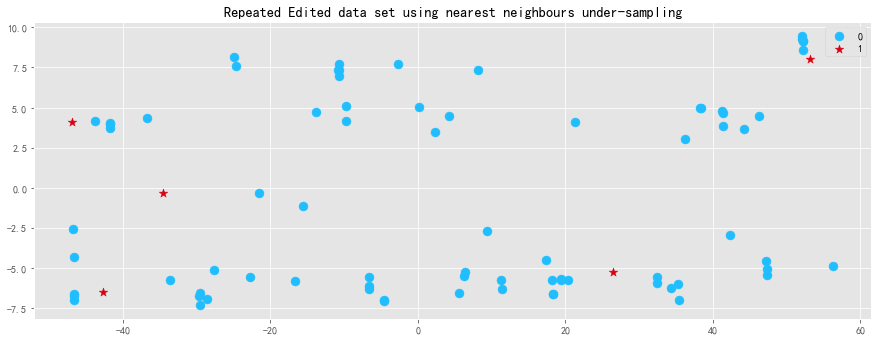

In [18]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours


renn = RepeatedEditedNearestNeighbours(sampling_strategy = 'auto',n_neighbors = 3)
X_renn, y_renn = renn.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_renn).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_renn, y_renn, 'Repeated Edited data set using nearest neighbours under-sampling')

#### AllKNN


[(0, 95), (1, 5)]
[(0, 84), (1, 5)]


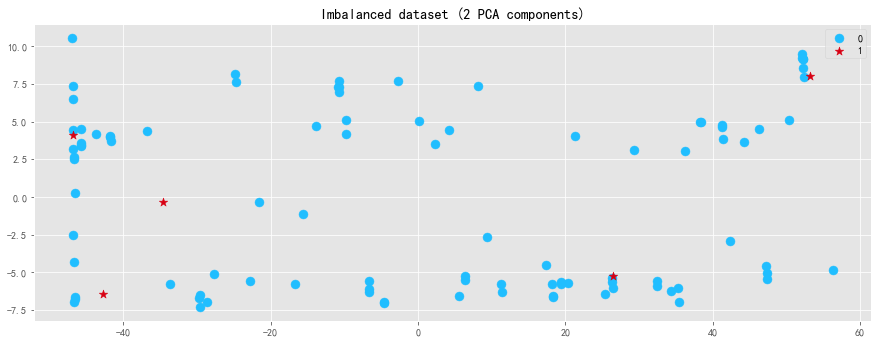

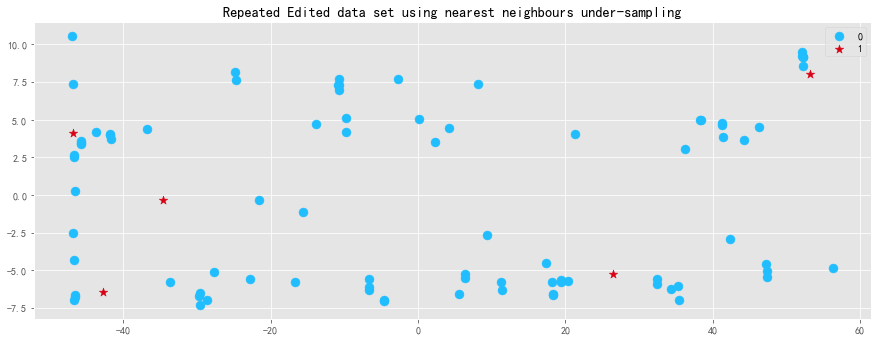

In [13]:
from imblearn.under_sampling import AllKNN

allknn = AllKNN(sampling_strategy = 'auto',n_neighbors = 3)
X_allknn, y_allknn = allknn.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_allknn).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_allknn, y_allknn, 'Repeated Edited data set using nearest neighbours under-sampling')

#### Cluster Centroids



[(0, 95), (1, 5)]
[(0, 5), (1, 5)]


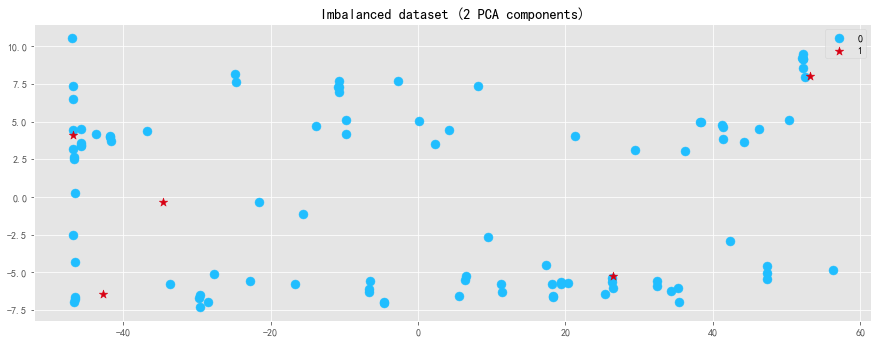

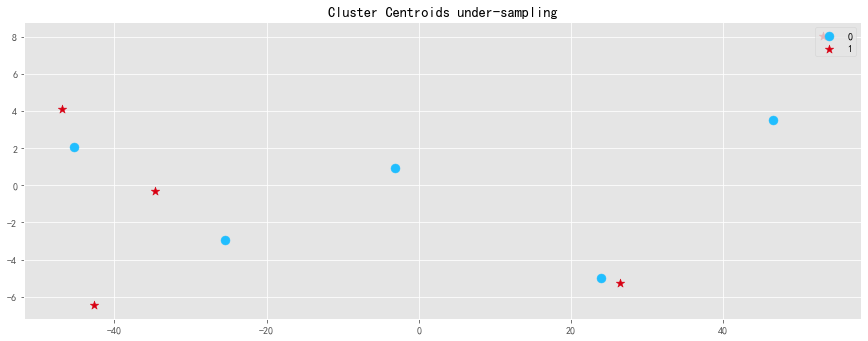

In [20]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_cc).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

### Over-sampling

- RandomOverSampler
- SMOTE 
- ADASYN

#### RandomOverSampler

90 new random picked points
[(0, 95), (1, 5)]
[(0, 95), (1, 95)]


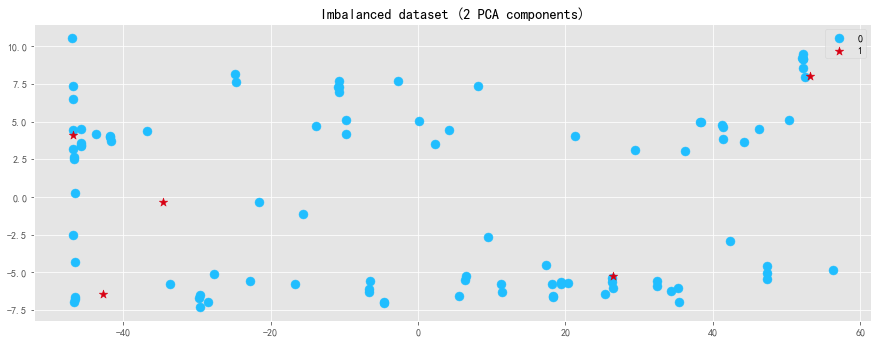

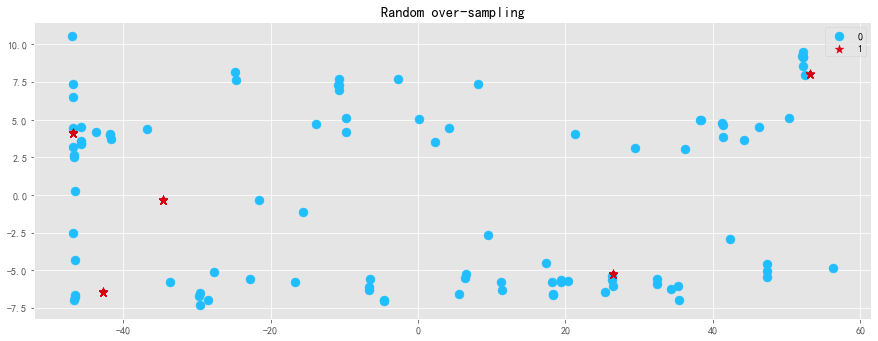

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print(sorted(Counter(y).items()))
print(sorted(Counter(y_ros).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_ros, y_ros, 'Random over-sampling')



#### SMOTE


> SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

---

> The combination of SMOTE and under-sampling performs better than plain under-sampling.

<div align=center>
<img src=https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png width='800' />
</div>

<div align=center>
<img src=https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808332241.png width='600' />
</div>

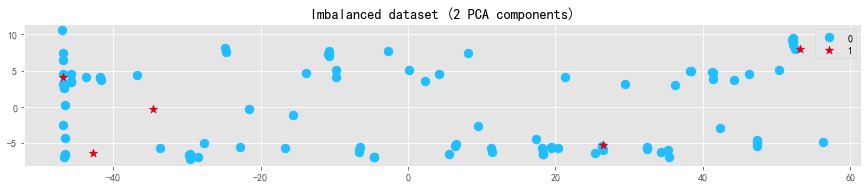

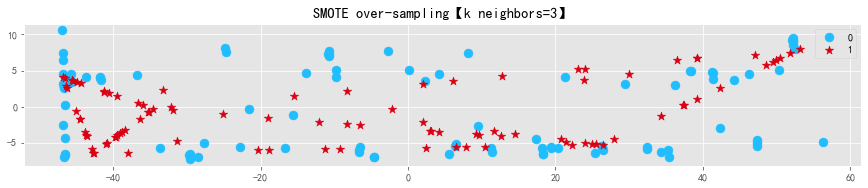

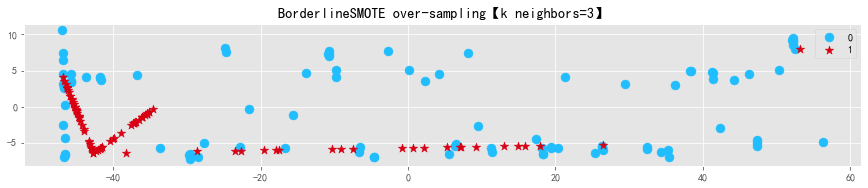

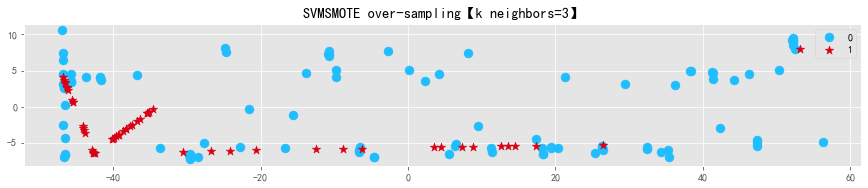

In [22]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,SVMSMOTE,KMeansSMOTE # 几种变式

smote = SMOTE(k_neighbors=3)
X_sm, y_sm = smote.fit_resample(X, y)

smote_border = BorderlineSMOTE(k_neighbors=3)
X_smbl, y_smbl = smote_border.fit_resample(X, y)

smote_svm = SVMSMOTE(k_neighbors=3)
X_smsvm, y_smsvm = smote_svm.fit_resample(X, y)


plt.subplot(4,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(4,1,2)
plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling【k neighbors=3】')
plt.subplot(4,1,3)
plot_2d_space(X_smbl, y_smbl, 'BorderlineSMOTE over-sampling【k neighbors=3】')
plt.subplot(4,1,4)
plot_2d_space(X_smsvm, y_smsvm, 'SVMSMOTE over-sampling【k neighbors=3】')

#### ADASYN



> SMOTE and ADASYN generate new samples in by interpolation. 

---

> ADASYN works similarly to the regular SMOTE. However, the number of samples generated for each x_i is proportional to the number of samples which are not from the same class than x_i in a given neighborhood. Therefore, more samples will be generated in the area that the nearest neighbor rule is not respected. The parameter m_neighbors is equivalent to k_neighbors in SMOTE.

[(0, 95), (1, 5)]
[(0, 95), (1, 95)]


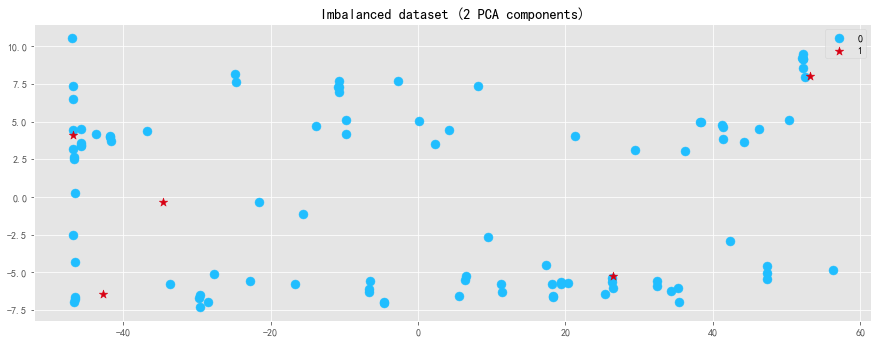

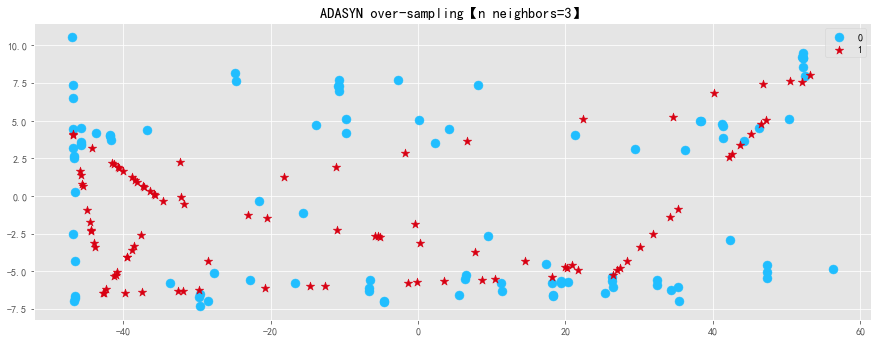

In [23]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(n_neighbors = 3)
X_ada, y_ada = ada.fit_resample(X, y)

print(sorted(Counter(y).items()))
print(sorted(Counter(y_ada).items()))

plt.subplot(2,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(2,1,2)
plot_2d_space(X_ada, y_ada, 'ADASYN over-sampling【n neighbors=3】')

###  Combination of over- and under-sampling

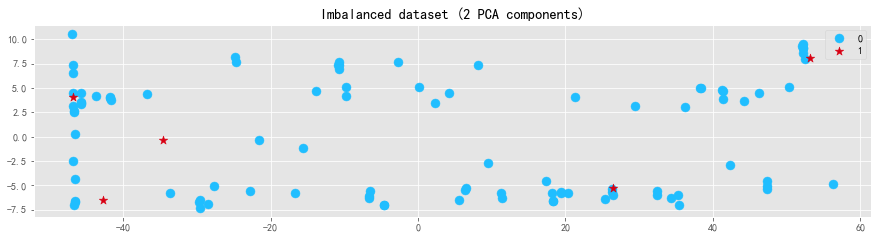

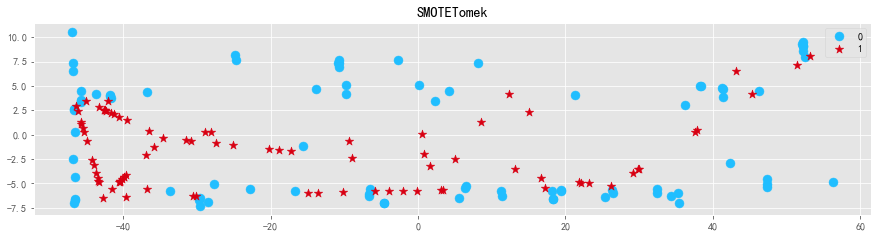

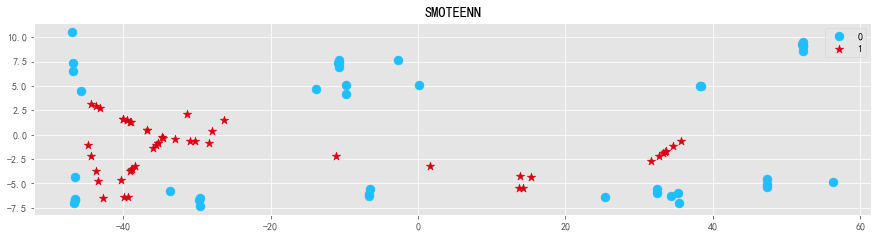

In [24]:
from imblearn.combine import SMOTETomek,SMOTEENN
smote_tomek = SMOTETomek(random_state=0,smote = SMOTE(k_neighbors=3))
X_smtom, y_smtom = smote_tomek.fit_resample(X, y)

smote_enn = SMOTEENN(random_state=0,smote = SMOTE(k_neighbors=3))
X_smen, y_smen = smote_enn.fit_resample(X, y)

plt.subplot(3,1,1)
plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')
plt.subplot(3,1,2)
plot_2d_space(X_smtom, y_smtom, 'SMOTETomek')
plt.subplot(3,1,3)
plot_2d_space(X_smen, y_smen, 'SMOTEENN')

可看到，Smotenn比SMOTETomek更容易清除噪音样本。

![](https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true)